<a href="https://colab.research.google.com/github/ctshiz/Econometrics/blob/main/Number%20of%20infant%20deaths/Number_of_Infant_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DOWNLOAD DATA FROM WORLDBANK CATALOG**

In [ ]:
#download excel file from worldbank data catalog to google colab
!gdown https://api.worldbank.org/v2/en/indicator/SH.DTH.IMRT?downloadformat=excel #number of infant deaths
!gdown https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=excel #GDP per capita

Downloading...
From: https://api.worldbank.org/v2/en/indicator/SH.DTH.IMRT?downloadformat=excel
To: /content/SH.DTH.IMRT?downloadformat=excel
100% 206k/206k [00:00<00:00, 7.71MB/s]
Downloading...
From: https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=excel
To: /content/NY.GDP.PCAP.CD?downloadformat=excel
100% 368k/368k [00:00<00:00, 8.37MB/s]


**IMPORT LIBRARIES**

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**EXPLORE THE DATA**

In [109]:
nid = pd.read_excel("/content/SH.DTH.IMRT?downloadformat=excel")
gpd = pd.read_excel("/content/SH.DTH.IMRT?downloadformat=excel")

In [111]:
nid.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Last Updated Date,2023-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,Number of infant deaths,SH.DTH.IMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Number of infant deaths,SH.DTH.IMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,1066441.0,1050665.0,1037654.0,1024422.0,1011775.0,1001063.0,992782.0,984477.0,974966.0,NaN


In [112]:
gpd.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Last Updated Date,2023-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,Number of infant deaths,SH.DTH.IMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Number of infant deaths,SH.DTH.IMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,1066441.0,1050665.0,1037654.0,1024422.0,1011775.0,1001063.0,992782.0,984477.0,974966.0,NaN


In [ ]:
#Transform the dataframe
def build_dataframe(content_, rename_columns):
  df = pd.read_excel(content_)
  df1 = df[2:]
  df2 = df1.rename(columns=df1.iloc[0])
  df3 = df2[1:]
  df4 = df3[['Country Name', 'Country Code', 'Indicator Name', 2021.0]]
  df5 = df4.rename(columns={2021.0:rename_columns})
  df6 = df5.reset_index()
  df7 = df6[['Country Name', 'Country Code', rename_columns]]
  return df7

nid = build_dataframe("/content/SH.DTH.IMRT?downloadformat=excel", "Number of infant deaths")
gpd = build_dataframe("/content/NY.GDP.PCAP.CD?downloadformat=excel", "GDP per capita")


#merge nid and gdp in one dataframe
df = nid.merge(gpd, on=["Country Name", "Country Code"], how='inner')
df1 = df.dropna()
df1.head()

,Country Name,Country Code,Number of infant deaths,GDP per capita
1,Africa Eastern and Southern,AFE,974966.0,1545.613215
2,Afghanistan,AFG,61247.0,355.777826
3,Africa Western and Central,AFW,1033665.0,1766.943618
4,Angola,AGO,62041.0,1927.474078
5,Albania,ALB,247.0,6377.203096


In [113]:
df1.describe()

,Number of infant deaths,GDP per capita
count,2.390000e+02,239.000000
mean,2.020116e+05,15758.374196
std,6.052832e+05,25248.340326
min,0.000000e+00,221.157803
25%,2.615000e+02,2136.192891
50%,3.202000e+03,6130.437137
75%,4.539750e+04,17658.250192
max,3.759949e+06,235132.784182


<Axes: ylabel='Number of infant deaths'>

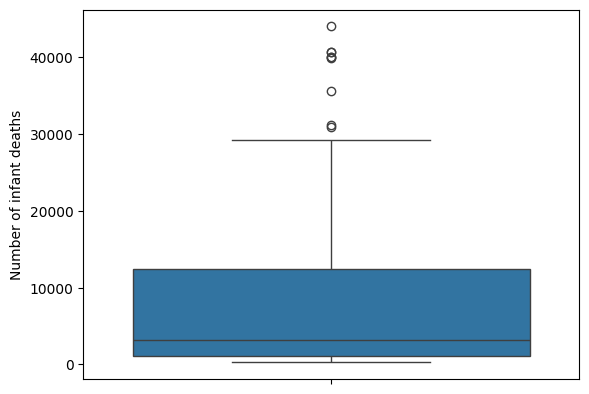

In [114]:
df2 = df1[(df1['Number of infant deaths'] > 2.615000e+02) & (df1['Number of infant deaths'] < 4.539750e+04)]

sns.boxplot(df2['Number of infant deaths'])

Text(0.5, 1.0, 'Relation of number of infant deaths and GDP per capita in 2021')

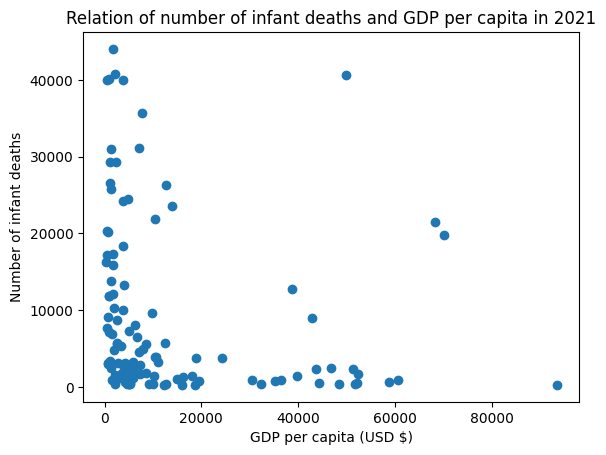

In [119]:
plt.scatter(x=df2['GDP per capita'], y=df2['Number of infant deaths'])
plt.xlabel("GDP per capita (USD $)")
plt.ylabel("Number of infant deaths")
plt.title("Relation of number of infant deaths and GDP per capita in 2021")

Note:


*   This is the same figure as of a reciprocal model: As the GDP per capita increases, we would expect a reduction in infant mortality because people may have higher healthcare spending, all other things being equal. But this relationship is not a straight line: when GDP per capita increases, there is initially a substantial reduction in infant mortality, but the decline is softened with the continued increase in GDP per capita. (Mukherjee, Chandan; White, Howard; Whyte, Mark. Econometrics and data analysis for developing countries. Londres: Routledge, 1998. p. 456.)



In [121]:
#Ajuste de um modelo recíproco
df3 = df2.copy()
df3['inverse of gdp'] = 1 / df3['GDP per capita']
df3.head()

,Country Name,Country Code,Number of infant deaths,GDP per capita,inverse of gdp
8,United Arab Emirates,ARE,531.0,44332.340051,0.000023
9,Argentina,ARG,3885.0,10650.860460,0.000094
10,Armenia,ARM,327.0,4972.783204,0.000201
13,Australia,AUS,939.0,60697.245436,0.000016
15,Azerbaijan,AZE,2143.0,5408.045352,0.000185


[[531.0], [3885.0], [327.0], [939.0], [2143.0], [16318.0], [391.0], [25832.0], [40102.0], [311.0], [5301.0], [35635.0], [1727.0], [17162.0], [1646.0], [3831.0], [293.0], [1282.0], [44050.0], [5676.0], [8077.0], [943.0], [385.0], [1455.0], [411.0], [2308.0], [1115.0], [5592.0], [18382.0], [3202.0], [40001.0], [8954.0], [908.0], [12768.0], [418.0], [2342.0], [1855.0], [2473.0], [418.0], [29275.0], [29259.0], [2953.0], [3166.0], [2818.0], [7319.0], [378.0], [3073.0], [12174.0], [305.0], [13272.0], [24520.0], [470.0], [915.0], [354.0], [3057.0], [1428.0], [3839.0], [40729.0], [2467.0], [6845.0], [719.0], [363.0], [5573.0], [606.0], [9106.0], [1113.0], [1774.0], [3358.0], [10054.0], [468.0], [39979.0], [21852.0], [30985.0], [920.0], [4864.0], [20167.0], [3301.0], [21441.0], [2031.0], [1605.0], [619.0], [13781.0], [740.0], [23635.0], [916.0], [6492.0], [8679.0], [1371.0], [2152.0], [1846.0], [1268.0], [40691.0], [1036.0], [5764.0], [11834.0], [3716.0], [15848.0], [337.0], [20340.0], [1086.0]

In [ ]:
#using matrical notation
y_=[]
for _ in df3['Number of infant deaths']:
  y_.append([_])

y = np.array(y_)

X = np.array([[1,80],
              [1,100],
              [1,120],
              [1,140],
              [1,160],
              [1,180],
              [1,200],
              [1,220],
              [1,240],
              [1,260]
              ])
XT = X.transpose()

XTX = np.dot(XT,X)
XTy = np.dot(XT,y)

inv_XTX = np.linalg.inv(XTX)
beta = np.dot(inv_XTX, XTy)
print(beta)
